# Introduction

* __Objective__
 * Build an end-to-end predictive machine learning model that can take any new song we like and predict its genre. 
 
 
* __Goals__
 * Find premade datasets and or curate a training set that's based on Spotify's API for the predictive model. 
 * Implement basic preprocessing & EDA and feature analysis (engineering, selection, etc).
 * Develop a model that shows good intelligence in genre prediction, also include a random baseline model for comparison. 
 * Assess which genres were better predicted and which ones didn't do as well.
 * Build a __prediction function__ that you can give a song title __and__ artist to that's capable of querying Spotify's API to drive a predictive guess on what the genre could be.
 
 
* __Initial Questions__
    * What are the average tempo & energy, key for different genres?
    * What about the most popular songs, in each genre, and what's their tempo & energy?
    * Can a song's musical elements (valence, loudness, instrumentalness, bpm) strongly indicate whether or not it belongs to a specific genre?

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math as mt
import plotly.express as px

In [3]:
# data = pd.read_csv("/Users/monte/Desktop/dataset.csv")
data = pd.read_csv("/Users/monte/Desktop/dataset.csv")

## Data Wrangling

In [4]:
# this function retrieves info on...
def dataset_info(df):
    # Potential Dups
    print("..... Duplicate Rows .....")
    print(f'Total Duplicates: {df.duplicated().sum()}\n')

    # A DF's Shape
    print("\n..... DataFrame Shape .....")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("\n")
    
    # Potential missing values 
    print("..... Missing Values .....")
    print(df.isna().sum(), '\n')
    
    # A DF's basic info
    print("..... DataFrame Information .....") 
    df.info()
    print("\n")
     
    # Any particular column's unique values
    print("..... Unique Values per Column .....")
    for column in df.columns:
        unique_vals = df[column].nunique()
        print(f'{column}: {unique_vals} unique values')
    print("\n")

    # A DF's first 10 rows
    print("..... DataFrame Head .....")
    display(df.head(10))
    
    # A DF's 10 Sample rows
    print("..... DataFrame's Sampled Rows .....")
    display(df.sample(10))
    return

In [5]:
def mins_rounded(seconds):
    duration = seconds / 1000
    return mt.ceil(duration)
data['secs_rounded'] = data['duration_ms'].apply(mins_rounded)

In [6]:
dataset_info(data)

..... Duplicate Rows .....
Total Duplicates: 0


..... DataFrame Shape .....
Rows: 114000, Columns: 22


..... Missing Values .....
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
secs_rounded        0
dtype: int64 

..... DataFrame Information .....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 no

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,secs_rounded
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,231
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,150
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,211
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,202
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,199
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,215
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,230
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic,243
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic,190
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic,206


..... DataFrame's Sampled Rows .....


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,secs_rounded
74001,74001,6Dc2tCivms1s2X9myWe4ni,Rodrigo Amarante,Tuyo (Narcos Theme) [A Netflix Original Series...,Tuyo (Narcos Theme) - A Netflix Original Serie...,65,89293,False,0.720,0.422,...,0,0.0690,0.474000,0.084700,0.1550,0.5460,112.219,4,mpb,90
104571,104571,2KrXkY8yRsncGk2kXPD4Zt,Leiva;Natalia Lafourcade,Cuando Te Muerdes el Labio,Diazepam,58,217400,False,0.436,0.460,...,1,0.0307,0.620000,0.000000,0.1700,0.3840,180.124,3,spanish,218
37199,37199,1g3CdJPxXVYk2r9VTUgMNX,Marvin Gaye,(60's) Sixties Collected Volume 2,I Heard It Through The Grapevine - Single Version,0,192266,False,0.722,0.450,...,0,0.0396,0.199000,0.000003,0.0739,0.6640,118.455,4,funk,193
102445,102445,20ElUw6wK2R29yY6WLeyC7,Sturgill Simpson,Country Car Hits,Brace for Impact - Live a Little,0,349266,False,0.616,0.706,...,1,0.0233,0.009750,0.309000,0.1110,0.6550,89.995,4,songwriter,350
13565,13565,733AB6gms9vKyMRzfzuU2e,Chez Damier;Ron Trent;M.D,Hip To Be Disillusioned Vol. 1,B2PRES107 - Original Mix,8,418235,False,0.880,0.723,...,1,0.0753,0.005450,0.934000,0.0919,0.5010,123.989,4,chicago-house,419
110866,110866,5m7ttxM7WpPZ0VfKKwniPX,Above & Beyond;Richard Bedford;Maor Levi,With Your Hope (Maor Levi Remix),With Your Hope - Maor Levi Remix,47,187663,False,0.609,0.964,...,1,0.0931,0.001650,0.018000,0.4060,0.2280,127.969,4,trance,188
9730,9730,4CpZ0tluVXhe13GEPPzIdg,Theo Rubia;AC Music,MFD - Manifestação dos Filhos de Deus (Ao Vivo),Um Milhão de Anos - Ao Vivo,44,436119,False,0.459,0.610,...,0,0.0330,0.006230,0.000000,0.0763,0.1090,134.080,4,brazil,437
90464,90464,3uwIoa2emQILz6BmH6MtiW,Elvis Presley,Girls! Girls! Girls!,"Return to Sender - From ""Girls! Girls! Girls!""",61,126693,False,0.845,0.563,...,1,0.0439,0.628000,0.000000,0.0614,0.9690,130.335,4,rock-n-roll,127
59105,59105,6Mjb3DsFX4uwSD6h78vuCS,Padra,Jabr,Jabr,5,204000,False,0.379,0.932,...,1,0.0516,0.000211,0.000003,0.1620,0.1920,180.056,4,iranian,204
110365,110365,4DkVMKiU48LNaLTiT0KPCc,Sajanka;Barsha,Global Tribes,Frozen,26,462004,False,0.544,0.824,...,0,0.0444,0.006610,0.701000,0.1180,0.0671,144.968,4,trance,463


### Checking for Duplicate and Missing Values

In [7]:
data[data['artists'].isna()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,secs_rounded
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop,0


### Renaming Columns

In [8]:
data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'secs_rounded'],
      dtype='object')

In [9]:
data = data.rename(
columns = {
    "Unnamed: 0": 'unnamed_0',
    "album_name": "album",
    "artists": "artist",
    "track_genre": "genre",
})

In [10]:
data.columns

Index(['unnamed_0', 'track_id', 'artist', 'album', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'genre', 'secs_rounded'],
      dtype='object')

### Dropping Columns

In [11]:
data = data.dropna()
data = data.drop(columns=['unnamed_0', 'track_id'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist            113999 non-null  object 
 1   album             113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

## Exploratory Data Analysis

Given there are 114 genres with each having 1,000 songs (excluding kpop having 999), I will use the parent genres and ignore the sub-, child genres (i.e. pop: k-pop, j-pop, power-pop, rock: alt-rock, punk-rock, hard-rock, rock-and-roll etc).
* Thus simplfying it down to 5 genres: Pop, Rock, Hip-Hop, R&B, and EDM and;
* Reduce the genres' length down to 120 songs per genre, totaling to 600 rows of data -- from 114k rows.

In [12]:
g = data['genre'].unique()
g

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [13]:
main_genres = ['pop', 'rock', 'hip-hop', 'r-n-b', 'edm']

def filter_genre(df, genres):
    return df[df['genre'].isin(genres)]

filtered_df = filter_genre(data, main_genres) #this takes the function above and filters the sub-genres away from main ones

sampled_df = [] #this is the actual filtering for-loop
for genre in main_genres:
    genre_df = filtered_df[filtered_df['genre'] == genre]  # filters the genres
    sampled_songs = genre_df.sample(n=120, random_state=12345)  # Get 120 songs per genre
    sampled_df.append(sampled_songs)

new_df = pd.concat(sampled_df)
print(new_df.shape)

(600, 20)


In [14]:
new_g = new_df['genre'].unique()
new_g

array(['pop', 'rock', 'hip-hop', 'r-n-b', 'edm'], dtype=object)

In [15]:
# # sanity check bar chart
# g = new_df.drop(columns=['artist', 'album','explicit', 'duration_ms'], axis=1)
# genres = g.groupby('genre')['track_name'].count().sort_values()
# genres.plot(kind='bar', edgecolor='black')
# plt.title("Genre ")
# plt.xlabel("Range of Songs that are Danceable")
# plt.ylabel("Number of Songs")
# plt.show()

In [16]:
dataset_info(new_df)

..... Duplicate Rows .....
Total Duplicates: 2


..... DataFrame Shape .....
Rows: 600, Columns: 20


..... Missing Values .....
artist              0
album               0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
genre               0
secs_rounded        0
dtype: int64 

..... DataFrame Information .....
<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 81144 to 30838
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            600 non-null    object 
 1   album             600 non-null    object 
 2   track_name        600 non-null    object 
 3   popularity        600 non-null    in

,artist,album,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,secs_rounded
81144,Amit Trivedi,Kedarnath,Namo Namo,71,322250,False,0.648,0.711,4,-6.216,1,0.0304,0.436,0.000000,0.1210,0.330,119.935,4,pop,323
81833,Sam Smith,CHRISTMAS TOP HITS 2022,The Lighthouse Keeper,0,247493,False,0.394,0.170,0,-10.368,1,0.0451,0.889,0.000000,0.1050,0.315,130.721,3,pop,248
81270,Justin Bieber;The Kid LAROI,Hidden Gems,Unstable,0,158324,False,0.495,0.333,4,-10.109,0,0.0288,0.737,0.000000,0.1120,0.370,99.757,4,pop,159
81468,Sam C.S.;Anirudh Ravichander;Shakthisree Gopalan,"Yaanji (From ""Vikram Vedha"")","Yaanji - From ""Vikram Vedha""",67,270375,False,0.692,0.624,9,-6.492,0,0.0337,0.368,0.000000,0.1080,0.487,132.896,4,pop,271
81962,Aastha Gill;Sachin Sanghvi;Jigar Saraiya;Divya...,Stree,Kamariya,65,187982,False,0.825,0.666,4,-4.847,0,0.0554,0.143,0.000003,0.2370,0.763,96.987,4,pop,188
81186,Darshan Raval;Rochak Kohli;R. D. Burman,Ek Ladki Ko Dekha Toh Aisa Laga,Ek Ladki Ko Dekha Toh Aisa Laga - Title Track,69,155172,False,0.532,0.603,10,-7.575,1,0.0545,0.756,0.000000,0.3230,0.431,173.955,4,pop,156
81942,Santhosh Dhayanidhi;Rakshita Suresh,Kutty Pattas,Kutty Pattas,65,239103,False,0.895,0.467,5,-10.480,0,0.1990,0.178,0.000000,0.0802,0.742,132.955,4,pop,240
81516,Chamath Sangeeth;Yohani;Satheeshan,Manike Mage Hithe,Manike Mage Hithe,67,162772,False,0.836,0.510,1,-10.091,0,0.3710,0.713,0.000034,0.1010,0.560,151.499,3,pop,163
81286,Justin Bieber,CHRISTMAS TOP HITS 2022,Christmas Eve,0,223613,False,0.409,0.570,6,-10.540,0,0.0711,0.687,0.000000,0.1730,0.336,128.657,4,pop,224
81458,Arijit Singh;Manan Bhardwaj;Khushalii Kumar,Dhokha,Dhokha,67,245160,False,0.463,0.834,6,-3.726,0,0.1290,0.290,0.000000,0.0888,0.347,183.953,4,pop,246


..... DataFrame's Sampled Rows .....


,artist,album,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,secs_rounded
87754,O Rappa,Anjos (Pra Quem Tem Fé),Anjos (Pra quem tem fé) - Versão completa,41,420592,True,0.601,0.865,10,-4.153,0,0.0450,0.10600,0.000188,0.1650,0.460,105.020,4,r-n-b,421
87286,Joan Sebastian,Más Allá Del Sol,La Medecina,47,160853,False,0.678,0.616,2,-6.723,1,0.0441,0.75200,0.000231,0.0470,0.689,105.831,4,r-n-b,161
30967,ILLENIUM;X Ambassadors;Alan Walker,In Your Arms (with X Ambassadors) [Alan Walker...,In Your Arms (with X Ambassadors) [Alan Walker...,53,249264,False,0.496,0.691,2,-5.443,1,0.0460,0.06970,0.000002,0.1120,0.199,159.885,4,edm,250
81284,Justin Bieber,Christmas Faves 2022,Mistletoe,0,183066,False,0.623,0.668,6,-7.282,0,0.0531,0.47500,0.000000,0.0862,0.823,161.948,4,pop,184
87430,Biquini Cavadão,1985/2007 Sucessos Regravados (Vol. 1),Zé Ninguém,44,258265,False,0.637,0.892,11,-5.284,0,0.0809,0.00464,0.000000,0.1990,0.845,130.010,4,r-n-b,259
30017,David Guetta;Bebe Rexha,New Pop Classics,I'm Good (Blue),2,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,edm,176
91073,OneRepublic,Christmas Songs 2022,Christmas Without You,1,197146,False,0.262,0.677,7,-5.645,1,0.0528,0.44700,0.000000,0.2050,0.365,207.478,3,rock,198
81304,Mithoon;Arijit Singh;Shashaa Tirupati,Half Girlfriend,Phir Bhi Tumko Chaahunga,70,351587,False,0.527,0.525,1,-8.106,1,0.0337,0.87600,0.000014,0.1720,0.257,99.638,4,pop,352
81220,Ed Sheeran;Lil Baby,Daily Pop Mix,2step,0,163449,False,0.693,0.643,4,-5.867,0,0.0828,0.13800,0.000000,0.1080,0.477,95.055,4,pop,164
91144,Creedence Clearwater Revival,Twisted Halloween Hits,I Put A Spell On You,0,271786,False,0.393,0.732,4,-8.188,0,0.0295,0.00471,0.123000,0.0979,0.621,100.410,4,rock,272


In [17]:
music_magic = new_df.drop(columns=['artist', 'album', 'track_name','explicit', 'genre', 'duration_ms'], axis=1)
music_magic.describe()

# notes
# On a scale from 0-100; the avg popularity for a song is at 36.
# On a scale of 0-1; the avg danceability is 0.63%
# On a scale of 0-1; the avg energy is at 0.66%
# On a scale of 0-1; the avg valence/happiness a song has is at 0.53
# On a scale of 0-243; the avg is 123 bpm (this is a moderate standard tempo)
# On a scale of 43-594 (in seconds | but 43 seconds to 9m 54s); the avg is 218 seconds (3 mins 38s)
# ig we're going with genre, popularity, danceability and tempo? -- I need to do a correlation matrix

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,secs_rounded
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,36.391667,0.637245,0.669567,5.533333,-6.552653,0.561667,0.083509,0.232456,0.018631,0.190704,0.538943,123.255987,3.933333,218.376667
std,32.431177,0.142674,0.170143,3.507524,2.616617,0.496597,0.077281,0.243998,0.089974,0.157929,0.226465,28.619344,0.368486,59.946009
min,0.000000,0.165000,0.104000,0.000000,-21.089000,0.000000,0.024100,0.000013,0.000000,0.027400,0.037800,62.507000,1.000000,43.000000
25%,0.000000,0.545750,0.556500,2.000000,-7.964000,0.000000,0.035975,0.033500,0.000000,0.093150,0.346000,100.320750,4.000000,179.000000
50%,43.000000,0.645500,0.688500,6.000000,-6.133000,1.000000,0.053100,0.131500,0.000001,0.129000,0.543500,123.054500,4.000000,209.000000
75%,66.000000,0.734000,0.802000,9.000000,-4.610750,1.000000,0.094425,0.390000,0.000250,0.236250,0.717000,140.994000,4.000000,244.250000
max,93.000000,0.964000,0.990000,11.000000,-0.079000,1.000000,0.504000,0.957000,0.921000,0.985000,0.979000,207.478000,5.000000,594.000000


On a scale from 0 to 100, the average popularity of a song is 36. In terms of danceability, the average score is 0.63, while the average energy level is slightly higher at 0.66. The average valence, which measures the happiness of a song, is recorded at 0.53. When examining tempo, the average beats per minute (BPM) is 123, representing a moderate standard tempo. Lastly, the average song duration is 218 seconds, or approximately 3 minutes and 38 seconds, within a range of 43 seconds to 9 minutes and 54 seconds.

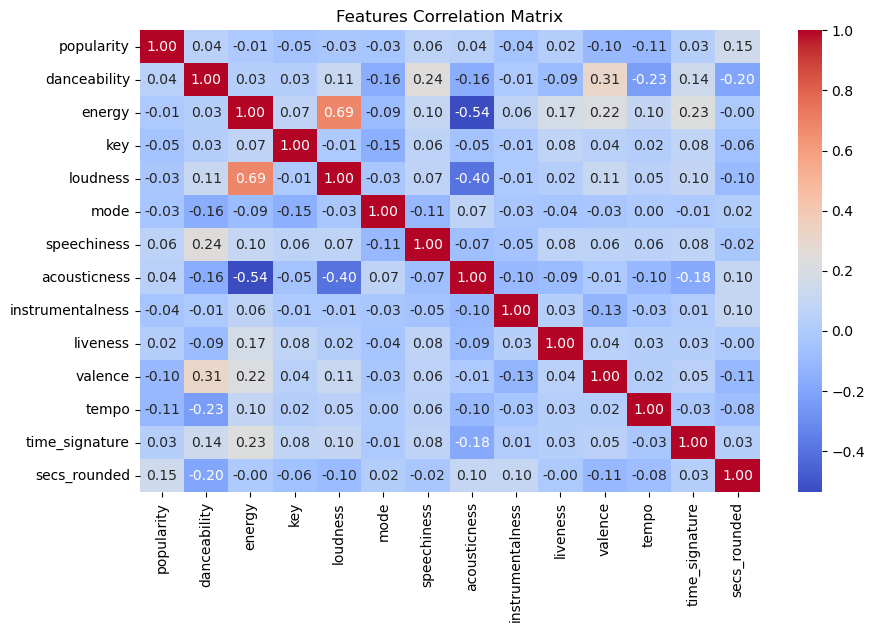

In [18]:
music_matrix = music_magic.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(music_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Features Correlation Matrix')
plt.show()

# this interactive plotly matrix works
# fig = px.imshow(music_matrix, aspect="auto")
# fig.show()

#notes
# the 2 strongest correlations I'm seeing is Energy & Loudness + Danceability & Valence.
# So Genre is going to be largest comparison to the other audible features

I want to create a full visual analysis (pie chart, smth else) but also respectively for all 5 genres in the form of a function. 
analyzing them from a -- key(bar), energy, loudness, tempo (histogram), danceability, valence(pie)

In [19]:
#this is a curated df meant to showcase the numerical data visually based on genres' features
visuals = new_df.drop(columns=['artist', 'album'], axis=1)

# segmented genres
p_visuals = visuals[visuals['genre'] == 'pop'] 
r_visuals = visuals[visuals['genre'] == 'rock'] 
hh_visuals = visuals[visuals['genre'] == 'hip-hop'] 
rnb_visuals = visuals[visuals['genre'] == 'r-n-b'] 
edm_visuals = visuals[visuals['genre'] == 'edm']

In [41]:
fig = px.scatter(visuals, x="energy", y="loudness",
	         size="key", color="genre",
                 hover_name="valence", log_x=True, size_max=15, title='Energy and Loudness Grouped by Genre') #changing the size_max scales the circles' sizes
fig.show()

In this scatterplot it visualizes songs between energy and loudness. The circle size of each scatter point is determined by the key of the song. The higher key values represents songs with higher key values and the smaller circles represent songs with lower key values.

The trend with this scatterplot seems to be a positive relationship between energy and loudness, which makes sense since high energy songs are often louder, and low energy songs tend to be softer.  

In [21]:
fig = px.bar(visuals, x="genre", y="key", color="explicit", title="Explicit Lyrics by Genre")
fig.show()

After analyzing the bar graphs for the genres we are working with, it becomes clear that there is a distinct difference between songs with explicit lyrics and those without. The data shows that the hip-hop genre has the highest number of songs containing explicit lyrics, while the rock genre features significantly fewer explicit tracks.

## All Genre Line-Ups

### Pop Visuals

In [40]:
fig = px.scatter(p_visuals, x="energy", y="loudness",
	         size="key", color="valence",
                 hover_name="genre", log_x=True, size_max=30, title='Energy vs Loudness of Songs Categorized by Valence') #changing the size_max scales the circles' sizes
fig.show()

In [48]:
p_visuals['valence'].describe()

count    120.000000
mean       0.517708
std        0.206321
min        0.134000
25%        0.344000
50%        0.532500
75%        0.674250
max        0.952000
Name: valence, dtype: float64

In this scatter plot, we examine the relationship between energy and loudness, categorized by the valence of the songs. Valence refers to the mood of the song, with higher values indicating happier emotions and lower values suggesting sadder or more negative moods.

In our dataset, the mean valence for pop songs is approximately 0.5177, indicating a generally positive mood. Additionally, 75% of the pop songs have a valence of 0.67425 or lower, which shows that a significant portion of pop songs tends to be more upbeat.

This analysis suggests that energy and loudness are correlated with the valence of the songs, helping to identify their emotional content.

In [23]:
fig = px.sunburst(p_visuals, path=['explicit', 'key', 'tempo'], values='popularity',
                  title='Pop Genre Popularity Scale - Categorized by the Lyrical Explicitness, their keys and tempo')
#the values here start from center to outer and its popularity is viewed via hovering.
fig.show()

In the sunburst chart we created, it visualizes the lyrical explicitness, key, and tempo of songs. The songs are divided into non-explicit, represented by blue, and explicit songs, represented by red. Most songs are categorized as non-explicit, as this occupies the majority of the chart. The chart is divided into three sections: the center categorizes the songs by explicitness (non-explicit or explicit), the second layer represents the keys of the songs, and the third layer illustrates the tempo of the songs.

### Rock Genre

In [24]:
fig = px.scatter(r_visuals, x="energy", y="loudness",
	         size="key", color="valence",
                 hover_name="genre", log_x=True, size_max=30, title='Energy vs Loudness of Songs Categorized by Valence') #changing the size_max scales the circles' sizes
fig.show()

In [50]:
r_visuals['valence'].describe()

count    120.000000
mean       0.547992
std        0.223082
min        0.103000
25%        0.369750
50%        0.550000
75%        0.699250
max        0.971000
Name: valence, dtype: float64

In this scatter plot, we also compare the energy of the songs to their loudness, categorized by the valence of the songs. As shown by the visual and the descriptive statistics, the average valence for rock songs is approximately 0.547992, indicating a generally positive mood. Additionally, 75% of the rock songs have a valence of 0.699250 or lower, suggesting that most rock songs tend to be upbeat. In contrast, 25% of the songs have a valence of 0.369750, indicating that a portion of rock songs may convey more negative or sadder emotions.

In [51]:
fig = px.sunburst(r_visuals, path=['explicit', 'key', 'tempo'], values='popularity',
                  title='Rock Genre Popularity Scale - Categorized by the Lyrical Explicitness, their keys and tempo')
#the values here start from center to outer and its popularity is viewed via hovering.
fig.show()

We also created a sunburst chart to visualize the lyrical explicitness, key, and tempo for the rock genre. The center of the sunburst chart represents the explicitness of the songs, categorized as explicit (red) and non-explicit (blue). As you can see, most of the songs in the rock genre are categorized as non-explicit. The second layer represents the key of the songs, ranging from 0 to 11, while the outer layer displays the tempo of the songs.

### Hip-Hop Genre

In [52]:
fig = px.scatter(hh_visuals, x="energy", y="loudness",
	         size="key", color="valence",
                 hover_name="genre", log_x=True, size_max=30, title='Energy vs Loudness of Songs Categorized by Valence in Hip-Hop') #changing the size_max scales the circles' sizes
fig.show()

In [58]:
hh_visuals['valence'].describe()

count    120.000000
mean       0.569016
std        0.224703
min        0.039900
25%        0.394500
50%        0.551500
75%        0.744250
max        0.965000
Name: valence, dtype: float64

According to the scatter plot we created, the darker colors represent lower valence, while the lighter colors indicate higher valence for hip-hop songs. You can see that most of the songs are in lighter colors, suggesting they have a higher valence. Hip-hop songs have a mean valence of approximately 0.569016, with 75% of the songs having a valence of 0.744250. Compared to the previous genres, this indicates that hip-hop has a more positive mood than both rock and pop.

In [55]:
fig = px.sunburst(hh_visuals, path=['explicit', 'key', 'tempo'], values='popularity',
                  title='Hip-Hop Genre Popularity Scale - Categorized by the Lyrical Explicitness, their keys and tempo')
#the values here start from center to outer and its popularity is viewed via hovering.
fig.show()

In this sunburst chart, we compared lyrical explicitness with key and tempo. Although hip-hop has a higher valence than rock and pop, we can observe that this genre contains more than 25% of songs with explicit lyrics.

### R&B Genre

In [54]:
fig = px.scatter(rnb_visuals, x="energy", y="loudness",
	         size="key", color="valence",
                 hover_name="genre", log_x=True, size_max=30, title='Energy vs Loudness of Songs Categorized by Valence in RnB Genre') #changing the size_max scales the circles' sizes
fig.show()

In [59]:
rnb_visuals['valence'].describe()

count    120.000000
mean       0.620992
std        0.235784
min        0.140000
25%        0.439000
50%        0.641000
75%        0.813750
max        0.979000
Name: valence, dtype: float64

he R&B genre exhibits a more scattered pattern compared to the previous charts (hip-hop, rock, and pop). According to the visual provided, 75% of the songs in the R&B genre have a valence of 0.81, indicating that most of the songs convey a more positive mood. In contrast, 25% of the songs have a valence of 0.43, suggesting that a portion of R&B songs may have a darker or more negative emotional tone.

In [53]:
fig = px.sunburst(rnb_visuals, path=['explicit', 'key', 'tempo'], values='popularity',
                  title='RnB Genre Popularity Scale - Categorized by the Lyrical Explicitness, their keys and tempo')
#the values here start from center to outer and its popularity is viewed via hovering.
fig.show()

In [63]:
rnb_visuals['key'].describe()

count    120.000000
mean       5.708333
std        3.503650
min        0.000000
25%        2.000000
50%        7.000000
75%        9.000000
max       11.000000
Name: key, dtype: float64

In [64]:
rnb_visuals['tempo'].describe()

count    120.000000
mean     121.421633
std       27.827361
min       72.590000
25%       99.535000
50%      124.137000
75%      140.380750
max      184.786000
Name: tempo, dtype: float64

In this sunburst chart created for the R&B genre, we can see that the majority of the songs do not have explicit lyrics. The average key for R&B songs is 5.7, which suggests that songs in a higher key may sound brighter and more energetic, while those in a lower key may sound deeper and more relaxed. Notably, 75% of the songs have a key value of 9 or higher, indicating a tendency towards more energetic keys, while 25% of the songs have a key value of 2, suggesting that a portion of the songs is more relaxed.

Regarding tempo, 75% of the R&B songs have a tempo of 140 BPM or higher, which is considered a high tempo (over 120 BPM). Conversely, 25% of the songs have a lower tempo, generally considered to be 100 BPM or less.

### EDM Genre

In [42]:
fig = px.scatter(edm_visuals, x="energy", y="loudness",
	         size="key", color="valence",
                 hover_name="genre", log_x=True, size_max=30, title='Energy vs Loudness for EDM Songs Categorized by Valence') #changing the size_max scales the circles' sizes
fig.show()

In [67]:
edm_visuals['valence'].describe()

count    120.000000
mean       0.439007
std        0.203537
min        0.037800
25%        0.283500
50%        0.435000
75%        0.620000
max        0.929000
Name: valence, dtype: float64

While comparing energy and loudness by the valence of the songs, we can see that the EDM genre in our dataset has a mean valence of approximately 0.439007, making it the lowest among the genres analyzed. Additionally, 75% of the EDM songs have a valence of 0.62, while 25% have a valence of 0.283500.

In [56]:
fig = px.sunburst(edm_visuals, path=['explicit', 'key', 'tempo'], values='popularity',
                  title='EDM Genre Popularity Scale - Categorized by the Lyrical Explicitness, their keys and tempo')
#the values here start from center to outer and its popularity is viewed via hovering.
fig.show()

In [68]:
edm_visuals['key'].describe()

count    120.000000
mean       5.616667
std        3.602481
min        0.000000
25%        2.000000
50%        6.000000
75%        8.250000
max       11.000000
Name: key, dtype: float64

In [69]:
edm_visuals['tempo'].describe()

count    120.000000
mean     123.796683
std       22.880974
min       75.024000
25%      108.769500
50%      123.946000
75%      127.984750
max      203.968000
Name: tempo, dtype: float64

In [72]:
edm_visuals['explicit'].value_counts()

explicit
False    109
True      11
Name: count, dtype: int64

After comparing explicit lyrics, key, and tempo in the EDM genre, we see that there are a total of 109 songs without explicit lyrics and 11 songs that do contain explicit lyrics. This means that approximately 9% of the total EDM songs have explicit lyrics, while 91% do not.

The average key for the EDM genre is 5.62, indicating that most songs fall in the middle range rather than being distinctly high or low. The average tempo of EDM songs is 123.79 BPM, which is considered upbeat, suggesting that the majority of EDM tracks maintain a lively and energetic pace.



### Danceability

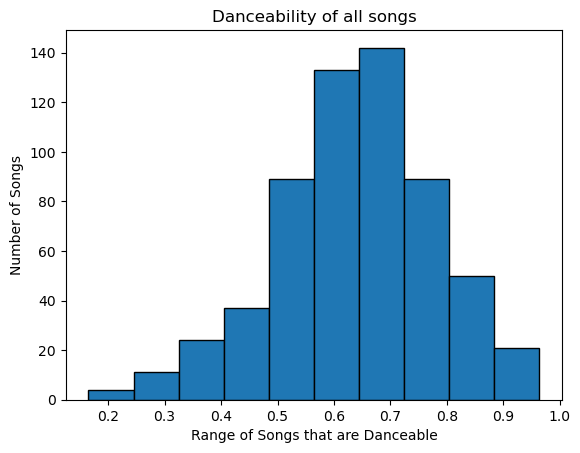

In [102]:
new_df['danceability'].plot(
kind='hist', edgecolor='black')
plt.title("Danceability of all songs")
plt.xlabel("Range of Songs that are Danceable")
plt.ylabel("Number of Songs")
plt.show()

By creating a histogram of the danceability of the songs, we can observe that it follows a normal distribution. The histogram is bell-shaped, featuring a single peak, with most values clustering around the mean.

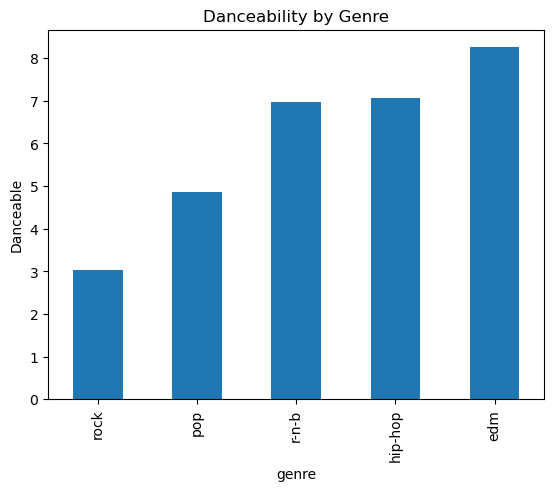

In [33]:
bar_graph = new_df.sample(50).groupby("genre")["danceability"].sum().sort_values()
bar_graph.plot(kind="bar",
              title="Danceability by Genre",
              ylabel = "Danceable")
plt.show()

After grouping the data by genre, we sampled 50 values to graph the danceability of each genre. The results show that EDM is the most danceable genre, while rock is the least danceable. Additionally, hip-hop has a slight edge over R&B in terms of danceability.

### Loudness

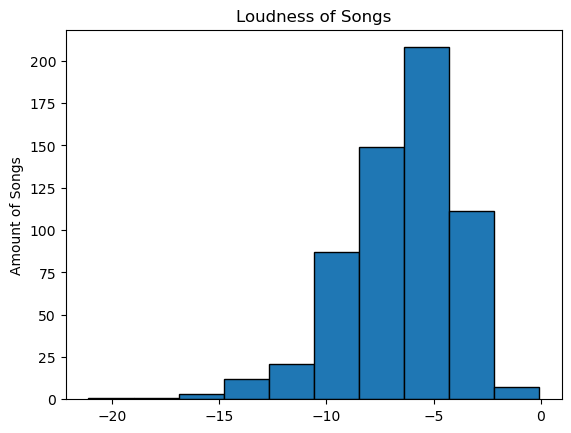

In [73]:
new_df['loudness'].plot(
kind='hist', edgecolor='black')
plt.title("Loudness of Songs")
plt.ylabel("Amount of Songs")
plt.show()

Considering the loudness of the songs in our dataframe, the histogram demonstrates a normal distribution, characterized by a bell-shaped curve. Most values are concentrated around the mean, indicating that the loudness levels of the songs follow this typical pattern.

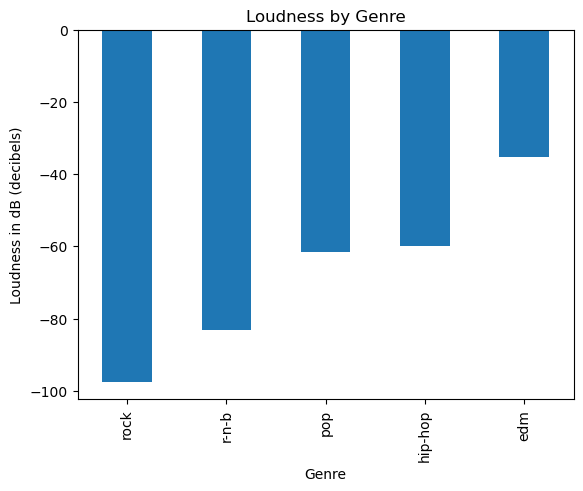

In [92]:
# Sample 50 values and group by genre, summing the loudness
bar_graph = new_df.sample(50).groupby("genre")["loudness"].sum().sort_values()

# Create a bar graph
bar_graph.plot(kind="bar",
               title="Loudness by Genre",
               ylabel="Loudness in dB (decibels)",
               xlabel="Genre")

# Show the plot
plt.show()


In the histogram above, we plotted the loudness of various genres using decibels (dB) as the measurement tool. The genre with the lowest decibel level is rock, followed by R&B, pop, and hip-hop. The genre with the highest decibel level is EDM.

### Popularity

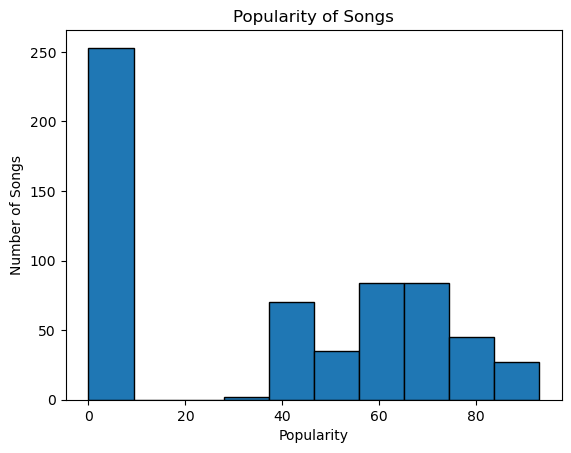

In [100]:
new_df['popularity'].plot(
    kind='hist', 
    edgecolor='black'
)

# Add title and labels
plt.title("Popularity of Songs")
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")

# Show the plot
plt.show()


Right-skewed: The distribution is skewed to the right, indicating that most songs have a relatively low popularity, while a few songs have exceptionally high popularity.  

Peak: The peak of the histogram is around 0-10, suggesting that the most common range of song popularity is between 0 and 10.


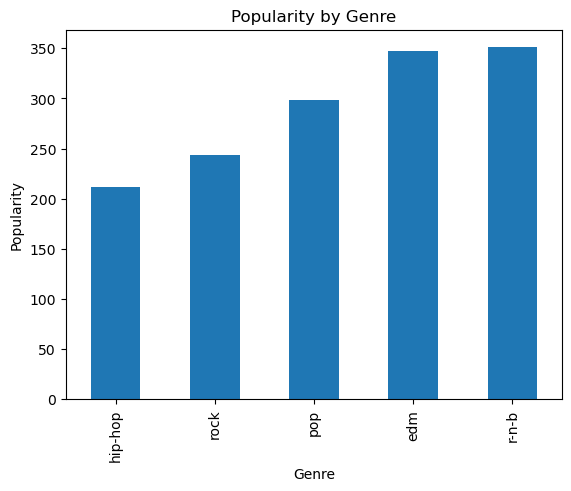

In [78]:

bar_graph = new_df.sample(50).groupby("genre")["popularity"].sum().sort_values()


bar_graph.plot(kind="bar",
               title="Popularity by Genre",
               ylabel="Popularity",
               xlabel="Genre")

plt.show()



In this dataset, we examined the popularity of different genres based on a sample of 50 rows. The analysis shows that R&B is the most popular genre, followed closely by EDM in second place. Pop ranks third, followed by rock, while hip-hop is the least popular genre in this sample.

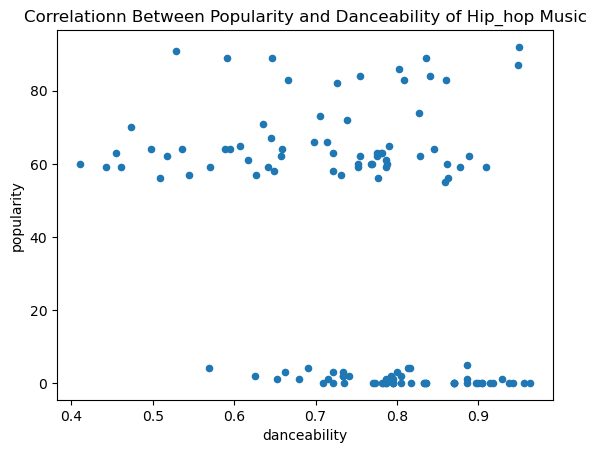

In [74]:
correlation_hiphop = new_df[new_df["genre"] == "hip-hop" ]

correlation_hiphop.plot(kind="scatter",
       x="danceability",
       y="popularity",
       ylabel="popularity",
       title="Correlationn Between Popularity and Danceability of Hip_hop Music")
plt.show()

Positive Correlation: There seems to be a general positive correlation between popularity and danceability. This suggests that songs with higher danceability tend to be more popular.  

Outliers: There are a few outliers, especially in the lower popularity range with high danceability. These could be songs that are popular for other reasons besides danceability.  

## Machine Learning

## Conclusion